# Gridded datasets

ERDDAP has a seperate mechanism for gridded data, like satellite and model/reanalysis products. This is called griddap. 

In [1]:
from erddapy import ERDDAP
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

### Specify server and protocol

Here we use a hi-res SST product from JPL via the coastwatch server https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41.html

In [2]:
e = ERDDAP(
    server="https://coastwatch.pfeg.noaa.gov/erddap",
    protocol="griddap",
)

e.dataset_id='jplMURSST41'

e.griddap_initialize() # This sends a background request to find the dataset's variables and extent
print(f"variables in this dataset:\n\n{e.variables}")


variables in this dataset:

['analysed_sst', 'analysis_error', 'mask', 'sea_ice_fraction']


In [3]:
e.constraints['latitude_step'] = 10
e.constraints['longitude_step'] = 10
e.variables = ['analysed_sst']

In [4]:
ds = e.to_xarray()

In [5]:
ds

<xarray.Dataset>
Dimensions:       (time: 1, latitude: 1800, longitude: 3600)
Coordinates:
  * time          (time) datetime64[ns] 2023-09-13T09:00:00
  * latitude      (latitude) float32 -89.99 -89.89 -89.79 ... 89.71 89.81 89.91
  * longitude     (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2023-09-13T09:00:00Z
    time_coverage_start:        2023-09-13T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -179.99

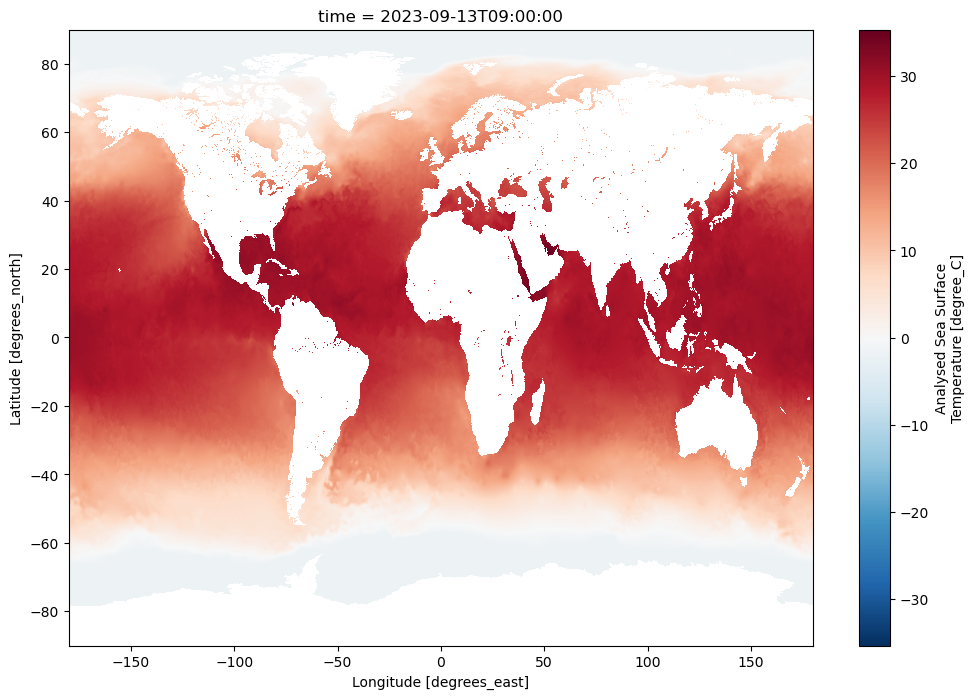

In [6]:
ds.analysed_sst.plot(figsize=(12, 8));

Gridded datasets can be very large. By default, erddapy returns only the most recent time slice of a dataset. This behaviour can be changed by adjusting the constraints, much like with tabledap. The mechanism for subsetting griddap data is a little more complicated, as the data are multi-dimensional.

Let's zoom in on the Gulf Stream and take a few time slices. To achieve this, we modify the constraints. We will tighten the lon/lat to a window of interest and request a wider timespan of data, taking every 30th day over the last few years

In [7]:
e.constraints = {'time>=': '2023-01-01',
 'time<=': '2023-05-01',
 'time_step': 30,
 'latitude>=': 25,
 'latitude<=': 45,
 'latitude_step': 1,
 'longitude>=': -90,
 'longitude<=': -30,
 'longitude_step': 1}

e.variables=['analysed_sst']

ds_gulf = e.to_xarray()

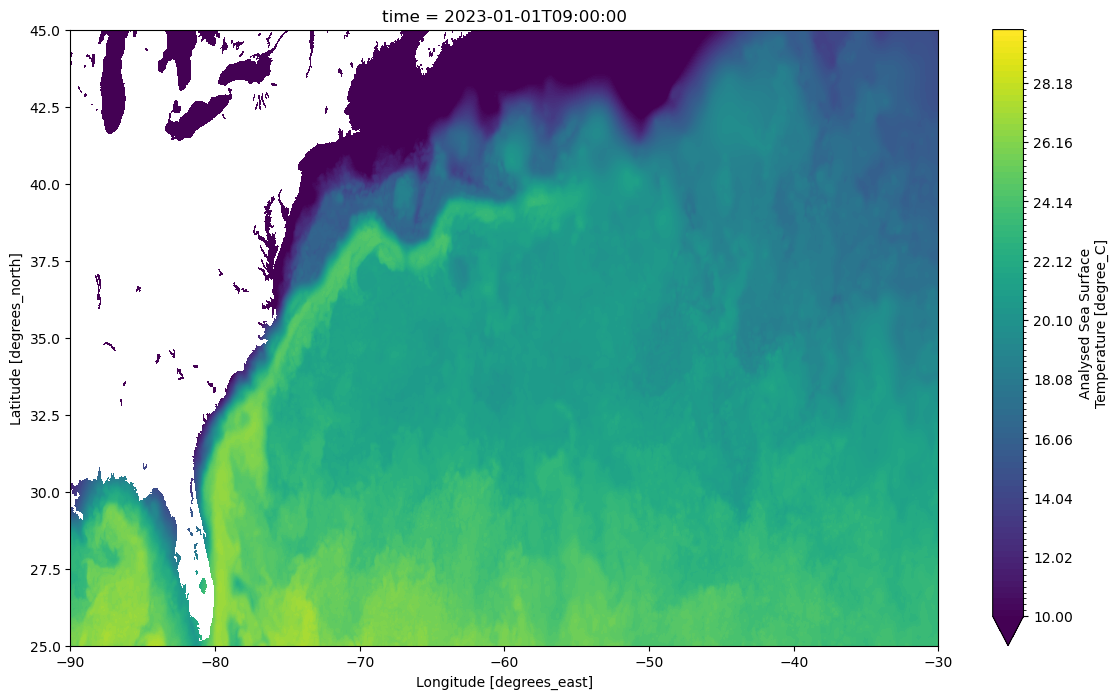

In [8]:
xr.plot.contourf(ds_gulf.sel(time="'2023-01-01", method="nearest").analysed_sst, vmin=10, vmax=30, levels=100, figsize=(14, 8));

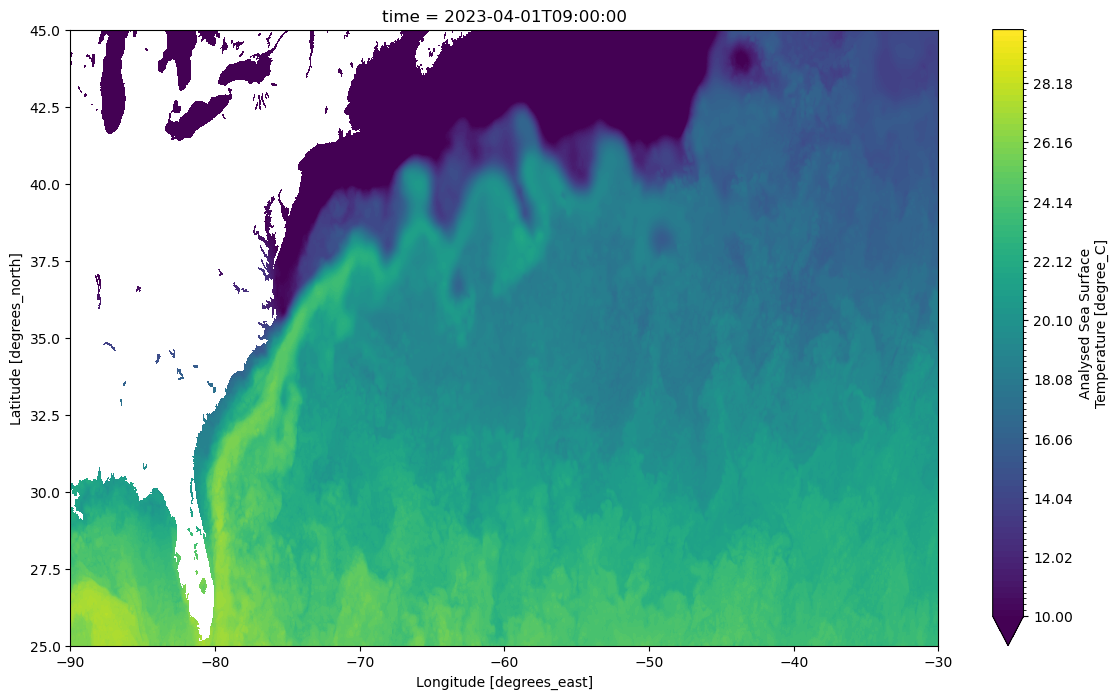

In [9]:
xr.plot.contourf(ds_gulf.sel(time="'2023-06-01", method="nearest").analysed_sst, vmin=10, vmax=30, levels=100, figsize=(14, 8));

----------------------------

### References

coastwatch ERDDAP https://coastwatch.pfeg.noaa.gov/erddap/index.html

For more information on how erddapy deals with griddap, see the [erddapy documentation example notebook](https://ioos.github.io/erddapy/01a-griddap-output.html)

### extra example: low-res topography

In [17]:
pacioos = ERDDAP(
    server="https://pae-paha.pacioos.hawaii.edu/erddap",
    protocol="griddap",
)
pacioos.dataset_id = "etopo5_lon180"
pacioos.griddap_initialize()


In [21]:
pacioos.constraints = {
 'latitude>=': 20,
 'latitude<=': 60,
 'latitude_step': 1,
 'longitude>=': -90,
 'longitude<=': -30,
 'longitude_step': 1}
topo = pacioos.to_xarray()


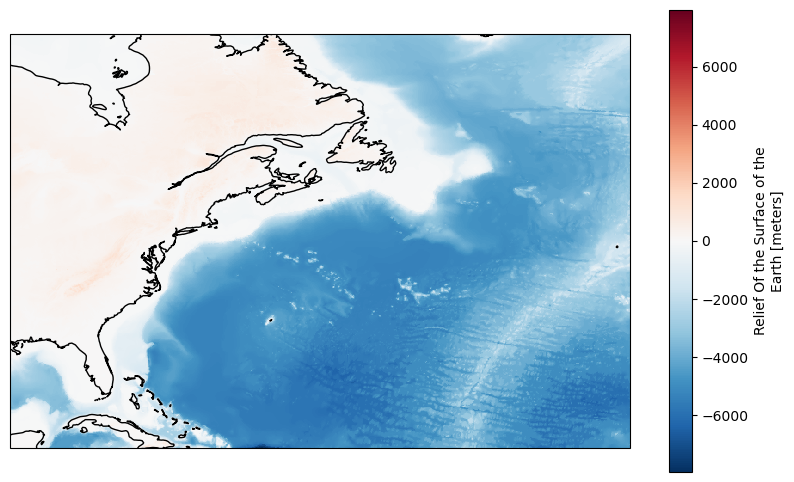

In [22]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(10, 6))
topo["ROSE"].plot(ax=ax)
ax.coastlines();